In [1]:
from fastai import *
from fastai.vision import *

help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [2]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [3]:
path = untar_data(URLs.PETS); path

PosixPath('/Users/ashirwadsangwan/.fastai/data/oxford-iiit-pet')

In [4]:
path.ls()

[PosixPath('/Users/ashirwadsangwan/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/ashirwadsangwan/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/Users/ashirwadsangwan/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/ashirwadsangwan/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/ashirwadsangwan/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/ashirwadsangwan/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/ashirwadsangwan/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

##### Now we have to extract the "Label" from the images itself

In [7]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(), size=224 )
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,pug,basset_hound,Siamese,Birman
Path: /Users/ashirwadsangwan/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,pomeranian,Persian,Siamese,Egyptian_Mau
Path: /Users/ashirwadsangwan/.fastai/data/oxford-iiit-pet/images;

Test: None

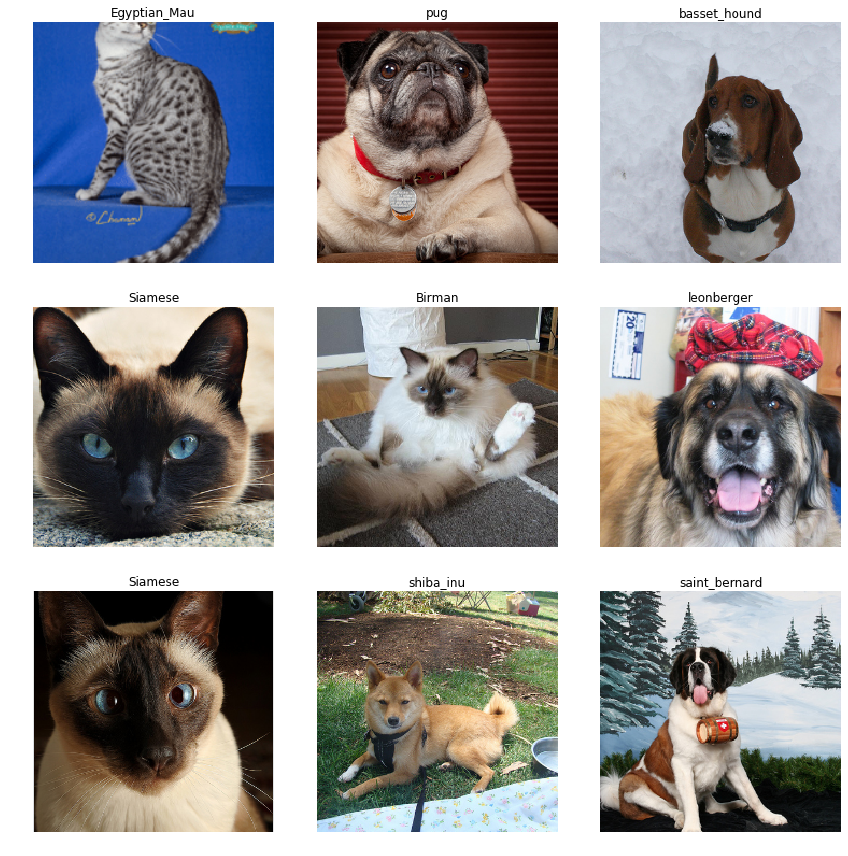

In [9]:
data.show_batch(3, (7,6))

In [10]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training ResNet34

Now we'll start training our model and will use a CNN backbone and a fully connected head with a single hidden layers as a classifier.
We'll train for 5 epochs

In [11]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

/anaconda3/lib/python3.7/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: DataLoader worker (pid 2767) is killed by signal: Unknown signal: 0. 